<a href="https://colab.research.google.com/github/thickiana/OIBSIP_domain_taskno3/blob/main/prediction_of_house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
df=pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


<Axes: xlabel='area', ylabel='Count'>

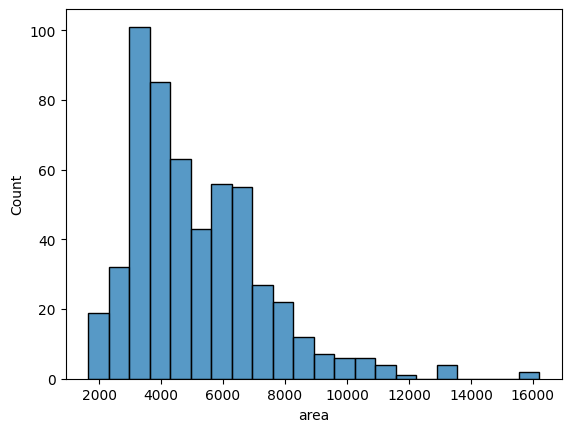

In [ ]:
sns.histplot(data=df,x='area')

<Axes: xlabel='area'>

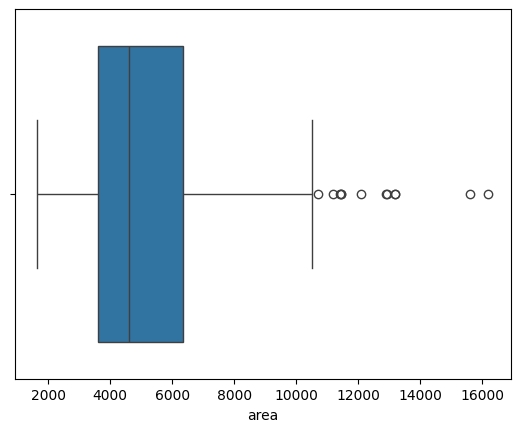

In [ ]:
sns.boxplot(data=df,x='area')

<Axes: xlabel='bedrooms', ylabel='count'>

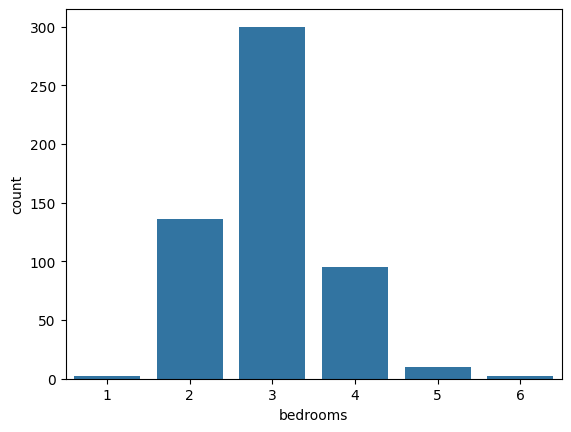

In [ ]:
sns.countplot(data=df,x='bedrooms')

In [ ]:
# check for the mean of all categories of bedrooms
df.groupby('bedrooms').price.mean()

,price
bedrooms,
1,2.712500e+06
2,3.632022e+06
3,4.954598e+06
4,5.729758e+06
5,5.819800e+06
6,4.791500e+06


In [ ]:
#replace category of house containing 6 bedroom to houese with 5 bedrooms and houses with 5 bedrooms with houses with 4 bedrooms.
# this is done for model simplicity
df.bedrooms.replace({6:3, 5:4}, inplace=True)

In [ ]:
df.bedrooms.value_counts()

,count
bedrooms,
3,302
2,136
4,105
1,2


<Axes: xlabel='bathrooms', ylabel='count'>

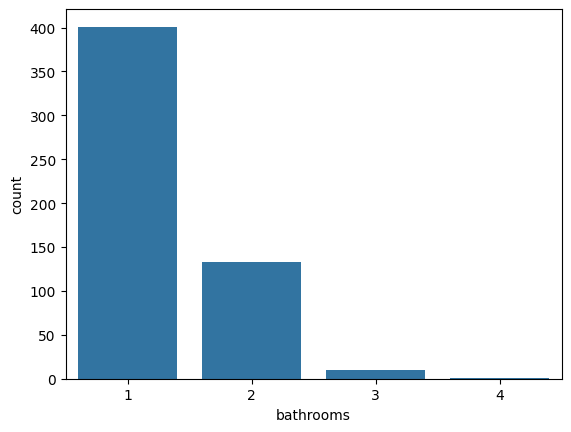

In [ ]:
sns.countplot(data=df,x='bathrooms')

In [ ]:
df.groupby('bathrooms').price.mean()

,price
bathrooms,
1,4.206913e+06
2,6.209206e+06
3,7.282100e+06
4,1.225000e+07


<Axes: xlabel='parking', ylabel='count'>

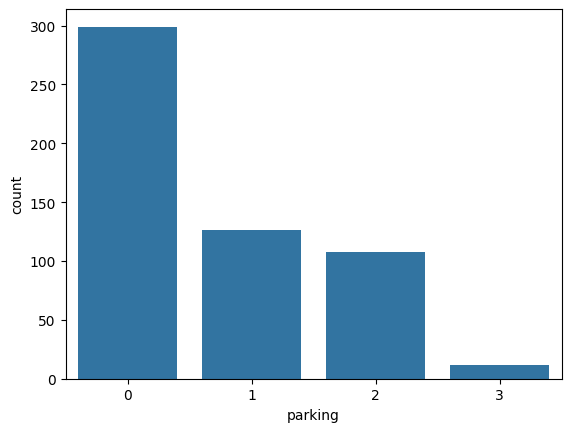

In [ ]:
sns.countplot(data=df,x='parking')

In [ ]:
df.groupby('parking').price.mean()

,price
parking,
0,4.136017e+06
1,5.190389e+06
2,5.896328e+06
3,5.867167e+06


In [ ]:
df.parking=df.parking.replace({3:2})

In [ ]:
df.parking.value_counts()

,count
parking,
0,299
1,126
2,120


<Axes: xlabel='stories', ylabel='count'>

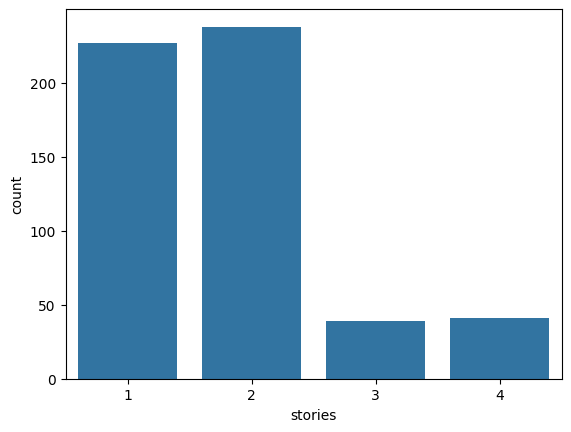

In [ ]:
sns.countplot(data=df,x='stories')

In [ ]:
df.groupby('stories').price.mean()

,price
stories,
1,4.170659e+06
2,4.764074e+06
3,5.685436e+06
4,7.208450e+06


<Axes: xlabel='mainroad', ylabel='count'>

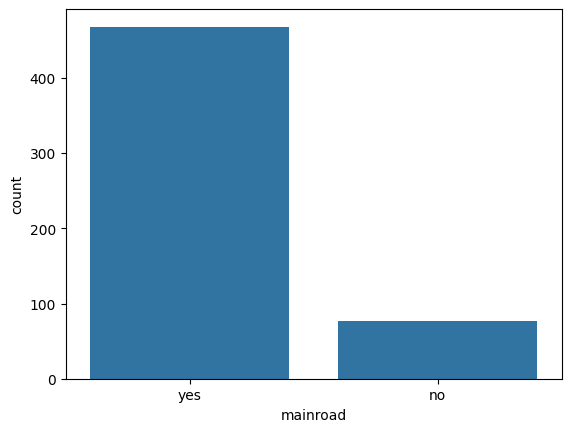

In [ ]:
sns.countplot(data=df,x='mainroad')

<Axes: xlabel='guestroom', ylabel='count'>

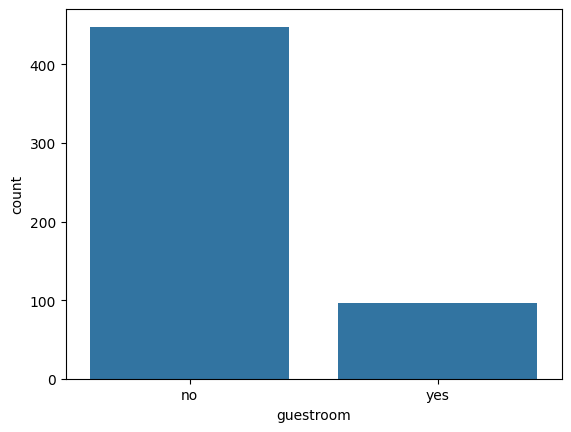

In [ ]:
sns.countplot(data=df,x='guestroom')

<Axes: xlabel='hotwaterheating', ylabel='count'>

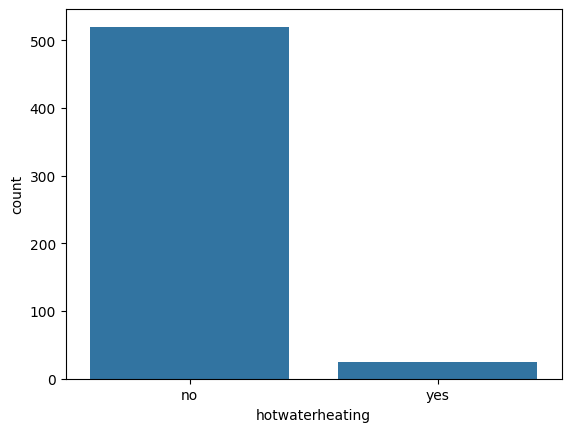

In [ ]:
sns.countplot(data=df,x='hotwaterheating')

<Axes: xlabel='airconditioning', ylabel='count'>

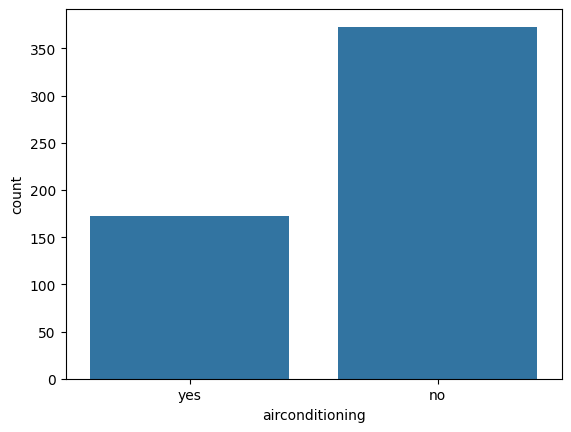

In [ ]:
sns.countplot(data=df,x='airconditioning')

<Axes: xlabel='prefarea', ylabel='count'>

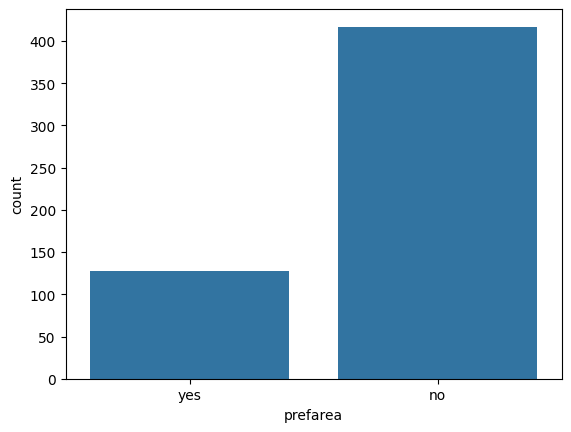

In [ ]:
sns.countplot(data=df,x='prefarea')

<Axes: xlabel='furnishingstatus', ylabel='count'>

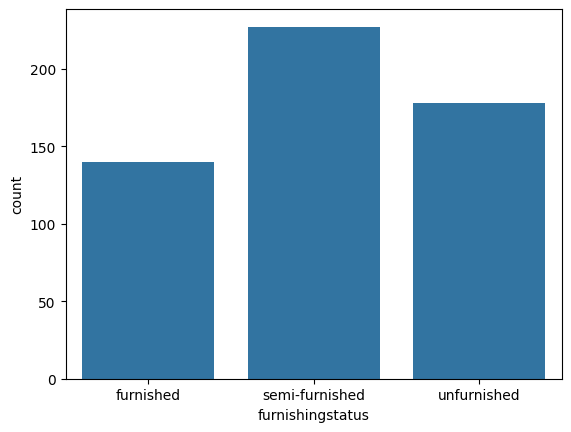

In [ ]:
sns.countplot(data=df,x='furnishingstatus')

BUILD A MODEL

In [ ]:
#SPLIT THE DATA INDEPENEDNT AND DEPENDENT DATA SET
x_org=df.drop('price',axis=1)
y_org=df['price']

In [ ]:
#create dummy variables for the categorical columns
x_org=pd.get_dummies(data=x_org,columns=x_org.select_dtypes(include='object').columns.to_list(),drop_first=True,dtype=int)

In [ ]:
x_org.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,2,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,2,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [ ]:
#split the data into train and test (70% train and 30% test)
x_org_train, x_org_test, y_org_train, y_org_test= train_test_split(x_org,y_org, test_size=0.3,random_state=1)

In [ ]:
x_org_train.shape

(381, 13)

In [ ]:
x_org_test.shape

(164, 13)

In [ ]:
y_org_train.shape

(381,)

In [ ]:
y_org_test.shape

(164,)

In [ ]:
#linear Regression
lr_org= LinearRegression()
lr_org.fit(x_org_train, y_org_train)

LinearRegression()

In [ ]:
#intercept of regression
lr_org.intercept_

np.float64(84244.48616505694)

In [ ]:
#intercept coef
lr_org.coef_

array([ 2.47135475e+02,  3.10128700e+04,  1.03412512e+06,  5.27306698e+05,
        2.95095062e+05,  4.66229857e+05,  2.70496193e+05,  5.47952115e+05,
        8.05182034e+05,  6.08629906e+05,  5.06558452e+05, -7.07827455e+04,
       -3.96477707e+05])

BUILD THE LINEAR REGRESSION FORMULA

In [ ]:
intercept=lr_org.intercept_
coeffients=lr_org.coef_


feature_names= x_org_train.columns
formula= f"y={intercept:2f}"
for name,coef in zip(feature_names, coeffients):
  formula  +=f" + ({coef:2f} * { name})"


print("linear Regression Formula")
print(formula)

linear Regression Formula
y=84244.486165 + (247.135475 * area) + (31012.869981 * bedrooms) + (1034125.117019 * bathrooms) + (527306.697868 * stories) + (295095.062440 * parking) + (466229.856622 * mainroad_yes) + (270496.192515 * guestroom_yes) + (547952.115298 * basement_yes) + (805182.033705 * hotwaterheating_yes) + (608629.905723 * airconditioning_yes) + (506558.451534 * prefarea_yes) + (-70782.745538 * furnishingstatus_semi-furnished) + (-396477.706878 * furnishingstatus_unfurnished)


In [ ]:
#predict on train and test
train_org_pred=lr_org.predict(x_org_train)
test_org_pred=lr_org.predict(x_org_test)

In [ ]:
#metrics
train_org_r2=r2_score(y_true=y_org_train,y_pred=train_org_pred)
test_org_r2=r2_score(y_true=y_org_test,y_pred=test_org_pred)

print(f"Training R-squared: {train_org_r2}")
print(f"Testing R-squared: {test_org_r2}")

Training R-squared: 0.6817906721202591
Testing R-squared: 0.6667598527264814


here, we see a r2 of 0.68 for train and 0.66 for test and it is not overfiiting.

In [ ]:
#checking the Rmse of the model
train_org_rmse=mean_squared_error(y_true=y_org_train,y_pred=train_org_pred)**0.5
test_org_rmse=mean_squared_error(y_true=y_org_test,y_pred=test_org_pred)**0.5

print(f"Trainng Rmse: {train_org_rmse}")
print(f"Testing Rmse:{test_org_rmse}")

Trainng Rmse: 1015843.6934553554
Testing Rmse:1164659.925779748


here, we observe that the rmse are re off by a significant amount in the original price scale.



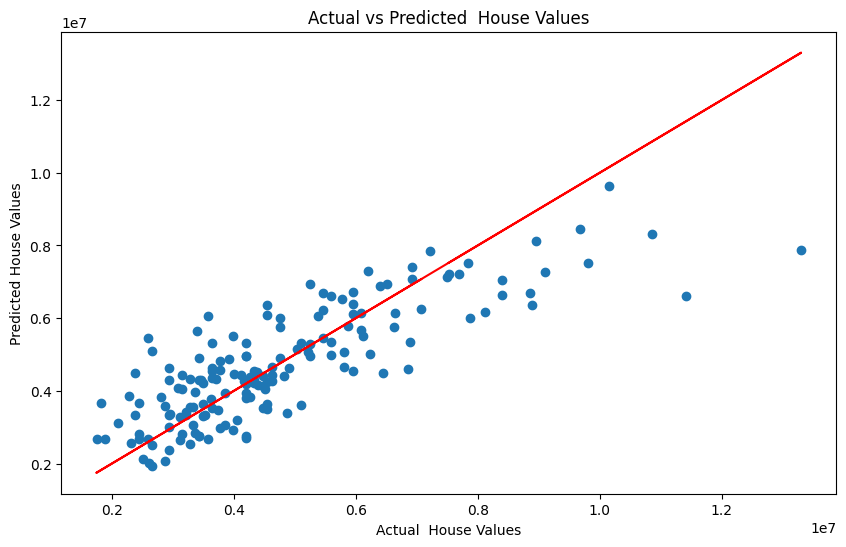

In [ ]:
plt.figure(figsize=(10, 6))


plt.scatter(y_org_test, test_org_pred)
plt.plot(y_org_test,y_org_test, color='red')
plt.xlabel('Actual  House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted  House Values')
plt.show()


from the plots,the model performed well but some data point scattered outside the red line shows the high rmse.this affect the performance of model prediction.

Normalization, like the log transformation you applied, aims to reduce the magnitude of these errors, especially for higher values,potentially leading to a model with lower prediction errors.

NORMALIZED TARGET VARIABLE

In [ ]:
df['log_price']=np.log(df['price'])
df = df.drop('price',axis=1)

In [ ]:
#dropping the price
x_log=df.drop('log_price', axis=1)
y_log=df['log_price']

In [ ]:
x_log = pd.get_dummies(data=x_log,columns=x_log.select_dtypes(include="object").columns.to_list(),drop_first=True,dtype=int)

In [ ]:
x_log.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,2,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,2,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [ ]:
x_log_train, x_log_test, y_log_train, y_log_test= train_test_split(x_log,y_log, test_size=0.3,random_state=1)

In [ ]:
lr_log= LinearRegression()
lr_log.fit(x_log_train, y_log_train)

LinearRegression()

In [ ]:
lr_log.intercept_

np.float64(14.347338357831658)

In [ ]:
lr_log.coef_

array([ 4.77449356e-05,  1.41920105e-02,  1.82690741e-01,  1.05623545e-01,
        5.33305883e-02,  1.36475077e-01,  6.49003645e-02,  1.30355865e-01,
        1.47010745e-01,  1.23856822e-01,  1.04722574e-01,  7.02491491e-03,
       -1.08172489e-01])

BUILDING LINEAR REGRESSION MODEL

In [ ]:
intercept=lr_log.intercept_
coeffients=lr_log.coef_


feature_names= x_log_train.columns
formula= f"y={intercept:2f}"
for name,coef in zip(feature_names, coeffients):
  formula  +=f" + ({coef:2f} * { name})"


print("linear Regression Formula")
print(formula)

linear Regression Formula
y=14.347338 + (0.000048 * area) + (0.014192 * bedrooms) + (0.182691 * bathrooms) + (0.105624 * stories) + (0.053331 * parking) + (0.136475 * mainroad_yes) + (0.064900 * guestroom_yes) + (0.130356 * basement_yes) + (0.147011 * hotwaterheating_yes) + (0.123857 * airconditioning_yes) + (0.104723 * prefarea_yes) + (0.007025 * furnishingstatus_semi-furnished) + (-0.108172 * furnishingstatus_unfurnished)


In [ ]:
#predict on train and test
train_log_pred=lr_log.predict(x_log_train)
test_log_pred=lr_log.predict(x_log_test)

In [ ]:
train_log_r2=r2_score(y_true=y_log_train,y_pred=train_log_pred)
test_log_r2=r2_score(y_true=y_log_test,y_pred=test_log_pred)

print(f"Training R-squared: {train_log_r2}")
print(f"Testing R-squared: {test_log_r2}")

Training R-squared: 0.705389464522164
Testing R-squared: 0.6691186228824096


In [ ]:
#checking the Rmse of the model
train_log_rmse=mean_squared_error(y_true=y_log_train,y_pred=train_log_pred)**0.5
test_log_rmse=mean_squared_error(y_true=y_log_test,y_pred=test_log_pred)**0.5

print(f"Trainng Rmse: {train_log_rmse}")
print(f"Testing Rmse:{test_log_rmse}")

Trainng Rmse: 0.19697632665008313
Testing Rmse:0.2251685077138113


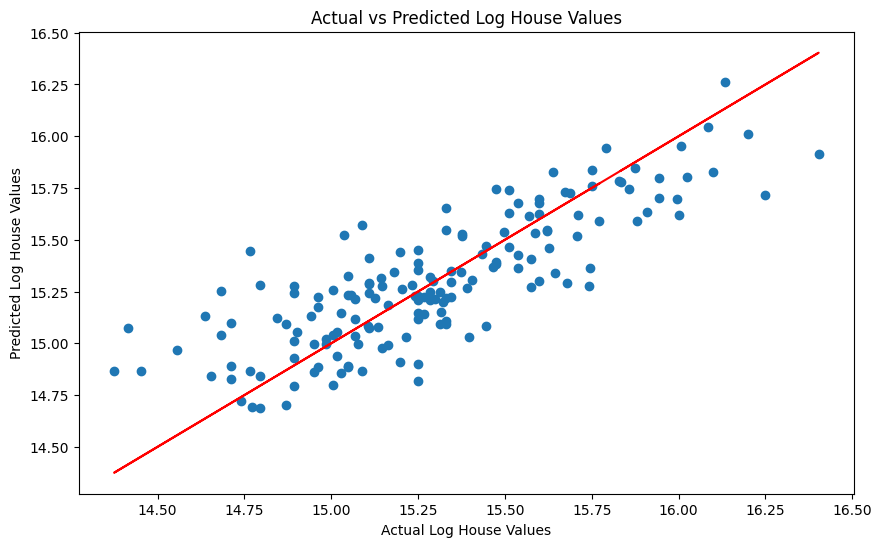

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_log_test, test_log_pred)
plt.plot(y_log_test, y_log_test, color='red')
plt.xlabel('Actual Log House Values')
plt.ylabel('Predicted Log House Values')
plt.title('Actual vs Predicted Log House Values')
plt.show()

In [ ]:
feature_importance = pd.DataFrame({
    'feature': x_log.columns,  # Changed from x.columns to x_log.columns
    'coefficient': lr_log.coef_, # Changed from lr_coef_ to lr_log.coef_
    'abs_coefficient': np.abs(lr_log.coef_) # Changed from lr_coef_ to lr_log.coef_
}).sort_values(by='abs_coefficient', ascending=False)

In [ ]:
feature_importance

,feature,coefficient,abs_coefficient
2,bathrooms,0.182691,0.182691
8,hotwaterheating_yes,0.147011,0.147011
5,mainroad_yes,0.136475,0.136475
7,basement_yes,0.130356,0.130356
9,airconditioning_yes,0.123857,0.123857
12,furnishingstatus_unfurnished,-0.108172,0.108172
3,stories,0.105624,0.105624
10,prefarea_yes,0.104723,0.104723
6,guestroom_yes,0.064900,0.064900
4,parking,0.053331,0.053331


Conclusions
here, we see that bathrooms influences the price of houses.peope tend to prefer houses with mutiple bedrooms especially large families because it provides  comfortabilty and reduces congestions especially in the mornings.
